<a href="https://colab.research.google.com/github/shubhams821/ML-Repository/blob/main/PCA_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Centering the dataset

In [ ]:
x_train_new = x_train.reshape(60000, 28*28)
import numpy as np
x_train_new_mean = x_train_new.mean(0)

In [ ]:
x_train_centered = x_train_new - x_train_new_mean
x_train_norm = x_train_centered/255
x = np.array(x_train_norm)
np.sum(x[:,1])
x.shape

(60000, 784)


coverting dataset to the form:
```
[x_1, x_2, ... , x_(60,000)]
```



In [ ]:
x = np.transpose(x)

**EigenValues and EigenVectors**

In [ ]:
from numpy.linalg import eig

a = np.matmul(x,  np.transpose(x))

In [ ]:
w,v = eig(a)

In [ ]:
np.linalg.norm(v[:,4])

1.0000000000000002

In [ ]:
np.sum(np.abs(w[0:250]))/np.sum(np.abs(w))

0.9780766576892211

In [ ]:
np.sum(w[0:250])/np.sum(w)


(0.9780766576892216+0j)

we can recover 97% of data by using only 250 eigen directions.

**First 250 Eigenvectors as Directions**

In [ ]:
w_new= w[0:250]
v_new = v[:,0:250]
v_new.shape


(784, 250)

In [ ]:
w

array([ 3.07007264e+05+0.00000000e+00j,  2.24479709e+05+0.00000000e+00j,
        1.95159254e+05+0.00000000e+00j,  1.70494400e+05+0.00000000e+00j,
        1.54024498e+05+0.00000000e+00j,  1.36417529e+05+0.00000000e+00j,
        1.03507574e+05+0.00000000e+00j,  9.12320939e+04+0.00000000e+00j,
        8.73768589e+04+0.00000000e+00j,  7.45637626e+04+0.00000000e+00j,
        6.67242584e+04+0.00000000e+00j,  6.39973660e+04+0.00000000e+00j,
        5.42799453e+04+0.00000000e+00j,  5.35299812e+04+0.00000000e+00j,
        4.99403505e+04+0.00000000e+00j,  4.69132375e+04+0.00000000e+00j,
        4.19025139e+04+0.00000000e+00j,  4.03946754e+04+0.00000000e+00j,
        3.75590884e+04+0.00000000e+00j,  3.64651734e+04+0.00000000e+00j,
        3.37281907e+04+0.00000000e+00j,  3.18473990e+04+0.00000000e+00j,
        3.01663125e+04+0.00000000e+00j,  2.88683408e+04+0.00000000e+00j,
        2.79465262e+04+0.00000000e+00j,  2.65518789e+04+0.00000000e+00j,
        2.57059479e+04+0.00000000e+00j,  2.48767078

In [ ]:
print((60000*784) - (60000*250) - (784*250),'values can be removed')

31844000 values can be removed


**Reconstruction datapoints**

In [ ]:
data_recons_points = np.matmul(np.transpose(x), v_new  )
data_recons_points.shape

(60000, 250)

**Using Eigenvectors and reconstruction datapoints to get the original dataset**

<ipython-input-14-45c1980f266a>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  imgplot = plt.imshow((255*(t )+ x_train_new_mean).astype('float').reshape(28,28),cmap='gray', vmin=0, vmax=255)


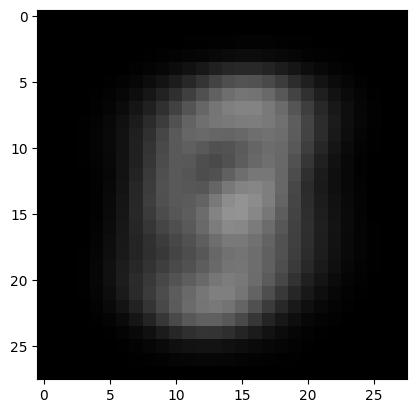

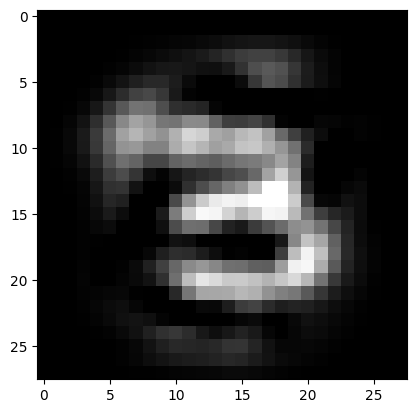

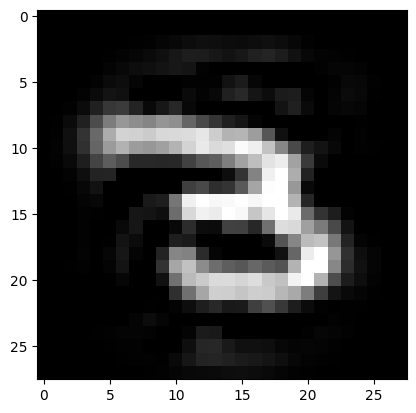

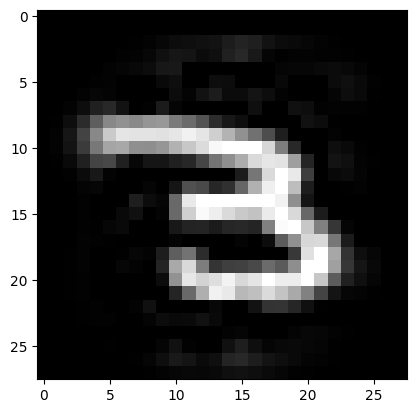

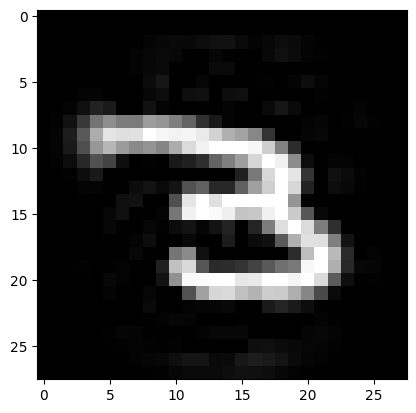

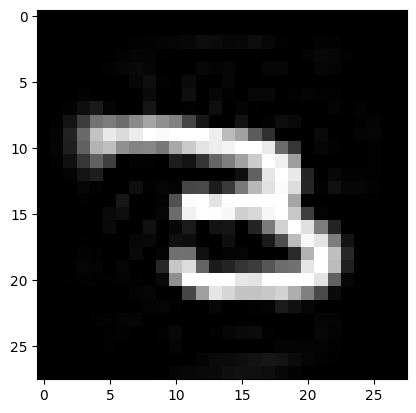

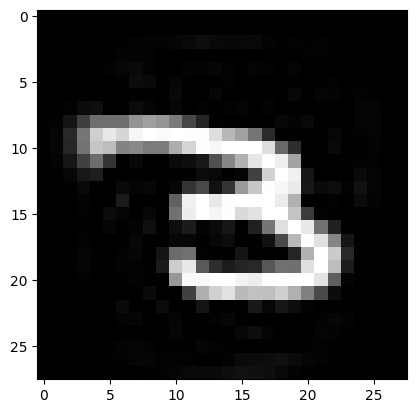

In [ ]:
t = 0
for i in range(250):
  t =  data_recons_points[250,i]*v_new[:,i] + t
  if i in range(0,250,39):
    imgplot = plt.imshow((255*(t )+ x_train_new_mean).astype('float').reshape(28,28),cmap='gray', vmin=0, vmax=255)
    plt.show()

In [ ]:
t.shape

(784,)

In [ ]:
zz =np.transpose( data_recons_points[20,:])
t = np.matmul(v_new,zz)


In [ ]:
t = 255*(t )+ x_train_new_mean
t = t.reshape(28,28)

In [ ]:
x_train_new_mean.shape
np.min(x_train_new[55,:])

0

In [ ]:
np.max(np.transpose(255*x[:,55] + x_train_new_mean) - x_train_new[55,:])


4.440892098500626e-16

In [ ]:
t.astype('float');

<ipython-input-20-2de317c5e3a1>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  t.astype('float');


In [ ]:
t= t.astype('float')
t.dtype

<ipython-input-21-9060823017d4>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  t= t.astype('float')


dtype('float64')

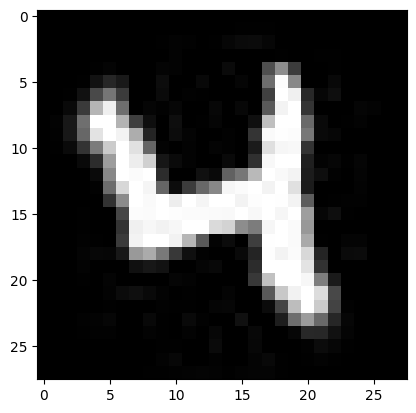

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgplot = plt.imshow(t,cmap='gray', vmin=0, vmax=255)

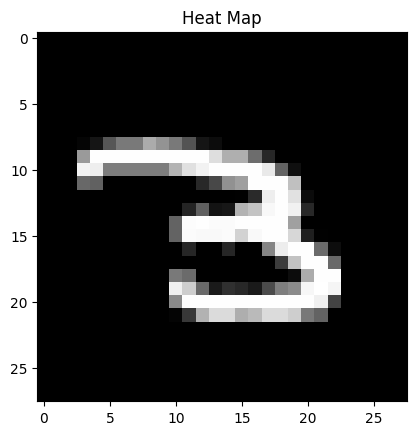

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define Data



# Heat map

plt.imshow( x_train_new[250,:].reshape(28,28), cmap='gray', vmin=0, vmax=255)

# Add Title

plt.title( "Heat Map" )

# Display

plt.show()


*Kernel PCA *

In [ ]:
x_train_new.shape

(60000, 784)

In [ ]:
ker_x = x_train_new[0:1000,:]
ker_x.shape

(1000, 784)

In [ ]:
ker_x_centered = ker_x - ker_x.mean(0)
ker_x_norm = ker_x_centered/255
k_x = np.array(ker_x_norm )
k_x = np.transpose(k_x)
k_x.shape

(784, 1000)

In [ ]:
ker_x.mean(0).shape

(784,)

In [ ]:
K = np.eye(1000)
for i in range(1000):
  for j in range(1000):
    K[i,j] = (np.matmul(np.transpose(k_x[:,i]), k_x[:,j]) + 1)**2

In [ ]:
from numpy.linalg import eig
ker_w,ker_v = eig(K);

In [ ]:
ker_w


array([1.34686764e+05, 8.24801246e+04, 7.36969045e+04, 6.09864515e+04,
       4.93332013e+04, 4.82913180e+04, 4.49405861e+04, 4.07901164e+04,
       3.67073588e+04, 3.35818474e+04, 3.20888465e+04, 3.02839000e+04,
       2.84407613e+04, 2.81983455e+04, 2.61486681e+04, 2.50528381e+04,
       2.31002776e+04, 2.28673424e+04, 2.14218810e+04, 2.11188101e+04,
       2.02783694e+04, 2.00448638e+04, 1.92410894e+04, 1.80553957e+04,
       1.76820105e+04, 1.70569512e+04, 1.67352790e+04, 1.61854728e+04,
       1.57729266e+04, 1.55650334e+04, 1.51452577e+04, 1.48324109e+04,
       1.44763207e+04, 1.40414777e+04, 1.38441972e+04, 1.35839309e+04,
       1.34964110e+04, 1.33251390e+04, 1.30421261e+04, 1.27333289e+04,
       1.24578217e+04, 1.20665260e+04, 1.19965142e+04, 1.17339744e+04,
       1.16767014e+04, 1.11781548e+04, 1.09502675e+04, 1.08932058e+04,
       1.08090130e+04, 1.06619581e+04, 1.05376011e+04, 1.03542235e+04,
       1.01183276e+04, 9.91238673e+03, 9.85091232e+03, 9.77016209e+03,
      

In [ ]:
np.sum(ker_w[0:2])/np.sum(ker_w)

0.07326030631183379

In [ ]:
alpha = np.zeros((1000, 1000))
for i in range(1000):
  alpha[:,i] = ker_v[:,i]/np.sqrt(1000*ker_w[i]);


In [ ]:
alpha.shape


(1000, 1000)

In [ ]:
k_x.shape

(784, 1000)

In [ ]:
ker_data_recons_points = np.matmul(np.transpose(k_x), alpha)
ker_data_recons_points.shape

ValueError: ignored

In [ ]:
ker_t = 0
for i in range(100):
  ker_t =  ker_data_recons_points[10,i]*ker_v1[:,i] + ker_t
  if i in range(0,100,19):
    imgplot = plt.imshow((255*(ker_t )+ ker_x.mean(0).reshape(28,28)).astype('float').reshape(28,28),cmap='gray', vmin=0, vmax=255)
    plt.show()

In [ ]:
a1 = np.matmul(x_train_new,  np.transpose(x_train_new))

In [ ]:
w1,v1 = eig(a1)

In [ ]:
w1

In [ ]:
import numpy as np
import pandas as pd
from itertools import accumulate

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = x_train.reshape(60000, 28*28)
x_train_new = x_train[0:1000,:]
import numpy as np
x_train_new_mean = x_train_new.mean(0)

In [ ]:
x_train_centered = x_train_new- x_train_new_mean
x_train_norm = x_train_centered/255
x = np.array(x_train_norm)
np.sum(x[:,1])
x.shape

In [ ]:
_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(x_train_centered[:, 0], x_train_centered[:, 1], c=y_train[0:1000],)
train_ax.set_xlabel("$x_{0}$")
train_ax.set_ylabel("$x_{1}$")
train_ax.set_title("Training data")

test_ax.scatter(x_test.reshape(10000,784)[:, 0], x_test.reshape(10000,784)[:, 1], c=y_test,cmap='viridis')
test_ax.set_xlabel("$x_{0}$")
test_ax.set_ylabel("$x_{1}$")
test_ax.set_title("Test data")
plt.show()

In [ ]:
kernel_pca = KernelPCA( kernel="rbf", gamma=1, fit_inverse_transform=True, alpha=2)

In [ ]:

kernel_pca.fit(x_train_new)

In [ ]:
score_kernel_pca = kernel_pca.transform(x_train_new)

In [ ]:

plt.plot(kernel_pca.eigenvalues_)

plt.title("Principal component and their eigenvalues")
plt.xlabel("nth principal component")
plt.ylabel("eigenvalue magnitude")
plt.show()

In [ ]:

kernel_pca.eigenvalues_

In [ ]:
plt.scatter(score_kernel_pca[:,0],score_kernel_pca[:,1] ,cmap='viridis')
plt.title("Projection onto PCs (kernel)")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()

In [ ]:
from numpy import hstack
from numpy.random import normal
from sklearn.mixture import GaussianMixture

In [ ]:
model = GaussianMixture(n_components=10, init_params='k-means++')

In [ ]:
model.fit(x_train_new)

GaussianMixture(init_params='k-means++', n_components=10)

In [ ]:
model.predict(x_train_new)

array([4, 8, 0, ..., 8, 5, 7])

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)